In [1]:
# Import Dependencies

import os

from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy.stats as st

import matplotlib.ticker as ticker

import seaborn as sns


In [2]:
# Read in Data Files

data = Path('Resources/salaries.csv')

df = pd.read_csv(data)

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


In [3]:
# Create New DataFrame with relavent information to the question being answered

# Impact of Experience level on Salary:

# "How does the level of professional experience impact the salaries of data science professionals?"

# Start of Joe's Data

df_exp = df[['experience_level', 'salary_in_usd']]

df_exp.head(25)

,experience_level,salary_in_usd
0,SE,199000
1,SE,196760
2,SE,90000
3,SE,70000
4,SE,324000
5,SE,159000
6,SE,222000
7,SE,159000
8,SE,175000
9,SE,150000


In [4]:
# Sort Data by Experience Level 
# EN: Entry-level / Junior
# MI: Mid-level / Intermediate
# SE: Senior-level / Expert
# EX: Executive-level / Director

df_exp.sort_values(by='experience_level' , ascending=True)

df_exp


,experience_level,salary_in_usd
0,SE,199000
1,SE,196760
2,SE,90000
3,SE,70000
4,SE,324000
...,...,...
8108,SE,412000
8109,MI,151000
8110,EN,105000
8111,EN,100000


In [5]:
# Get Median Salary per Experience level

df_exp.describe()

median_salary = df_exp.groupby('experience_level')['salary_in_usd'].median()

median_salary

experience_level
EN     76416.5
EX    185000.0
MI    106500.0
SE    154470.0
Name: salary_in_usd, dtype: float64

In [6]:
# Get total number of open positions based on Experience Level

total_job = df_exp.groupby('experience_level').nunique()

total_job

,salary_in_usd
experience_level,
EN,213
EX,136
MI,510
SE,1213


In [7]:
# Get Min and Max Salary per Experience Level

min_salary = df_exp.groupby('experience_level')['salary_in_usd'].min()

min_salary

max_salary = df_exp.groupby('experience_level')['salary_in_usd'].max()

max_salary

experience_level
EN    252990
EX    416000
MI    450000
SE    417937
Name: salary_in_usd, dtype: int64

In [8]:
# Get Median Salary per Company Size (across all levels)

# S: less than 50 employees (small) M: 50 to 250 employees (medium) L: more than 250 employees (large)

df_company = df[['experience_level', 'salary_in_usd', 'company_size']]

df_company.head()

median_company_salary = df_company.groupby('company_size')['salary_in_usd'].median()

median_company_salary 

company_size
L    129781.0
M    145000.0
S     75000.0
Name: salary_in_usd, dtype: float64

In [9]:
# Get Median Salary per Experience level based on Company Size

company_experience_median = df_company.groupby(['company_size', 'experience_level'])['salary_in_usd'].median()

company_experience_median


company_size  experience_level
L             EN                   60000.0
              EX                  153667.0
              MI                   86564.0
              SE                  150000.0
M             EN                   85000.0
              EX                  186100.0
              MI                  110000.0
              SE                  155000.0
S             EN                   60103.5
              EX                  147611.0
              MI                   60938.0
              SE                  104080.0
Name: salary_in_usd, dtype: float64

In [10]:
# Get Min / Max Salary per Experience level based on Company Size

company_experience_max = df_company.groupby(['company_size', 'experience_level'])['salary_in_usd'].max()

company_experience_max

company_experience_min = df_company.groupby(['company_size', 'experience_level'])['salary_in_usd'].min()

company_experience_min


company_size  experience_level
L             EN                  15000
              EX                  76309
              MI                  15680
              SE                  18381
M             EN                  16455
              EX                  15000
              MI                  15000
              SE                  18907
S             EN                  15966
              EX                  69741
              MI                  16904
              SE                  15809
Name: salary_in_usd, dtype: int64

In [11]:
# Form new DataFrame with new Data extracted

df_cleaned = pd.DataFrame({
                           'Median Salary' : (median_salary),
                           # 'Min Salary' : (min_salary),
                           'Max Salary'  : (max_salary),
                        #    'Total Job' : total_job.salary_in_usd
                           })

df_cleaned


,Median Salary,Max Salary
experience_level,,
EN,76416.5,252990
EX,185000.0,416000
MI,106500.0,450000
SE,154470.0,417937


In [12]:
# Median Salary DataFrame by Company Size

company_size_L = df_company[(df_company['company_size'] == 'L')]

company_size_M = df_company[(df_company['company_size'] == 'M')]

company_size_S = df_company[(df_company['company_size'] == 'S')]

company_size_L_salary = company_size_L.groupby('experience_level')['salary_in_usd'].median()

company_size_M_salary = company_size_M.groupby('experience_level')['salary_in_usd'].median()

company_size_S_salary = company_size_S.groupby('experience_level')['salary_in_usd'].median()

Company_size_df = pd.DataFrame({'Company size L' : (company_size_L_salary),
                                'Company size M' : (company_size_M_salary),
                                'Company size S' : (company_size_S_salary)})

Company_size_df

,Company size L,Company size M,Company size S
experience_level,,,
EN,60000.0,85000.0,60103.5
EX,153667.0,186100.0,147611.0
MI,86564.0,110000.0,60938.0
SE,150000.0,155000.0,104080.0


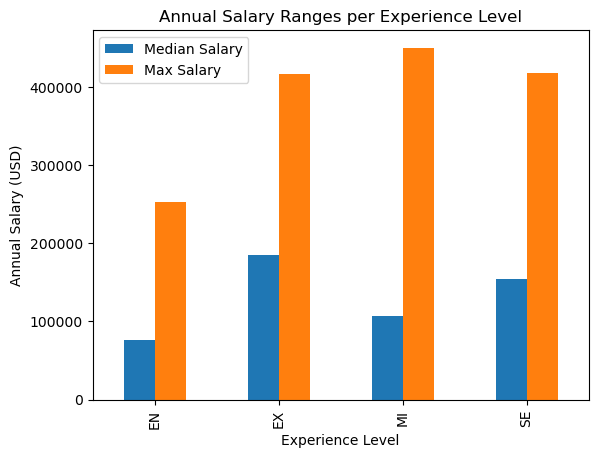

In [13]:
# Graph Findings / Chart 1
# EN: Entry-level / Junior
# MI: Mid-level / Intermediate
# SE: Senior-level / Expert
# EX: Executive-level / Director

df_cleaned.plot(kind='bar', xlabel= 'Experience Level', ylabel= 'Annual Salary (USD)', title= 'Annual Salary Ranges per Experience Level')

plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_1.png')

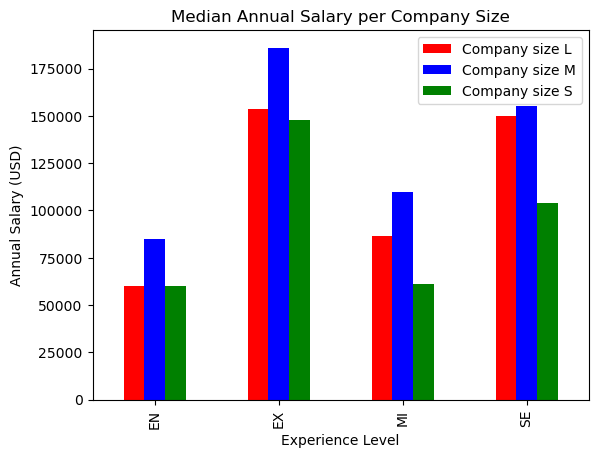

In [14]:
# Chart 2  
# EN: Entry-level / Junior
# MI: Mid-level / Intermediate
# SE: Senior-level / Expert
# EX: Executive-level / Director

Company_size_df.plot(kind='bar',xlabel= 'Experience Level', ylabel= 'Annual Salary (USD)', title= 'Median Annual Salary per Company Size', color= ['Red', 'Blue', 'Green'])

plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_2.png')

In [15]:
# Start of Jonathan's Data

geoLocDF = pd.read_csv(data)

In [16]:
#  Base DataFrame

geoLocDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8108,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8109,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8110,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8111,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [17]:
# Generating summary statistics table
countryData = geoLocDF.groupby(['company_location'])

countryMean = countryData['salary_in_usd'].mean()
countryMed = countryData['salary_in_usd'].median()
countryVar = countryData['salary_in_usd'].var()
countryStD = countryData['salary_in_usd'].std()
countrySEM = countryData['salary_in_usd'].sem()

countryDF = pd.DataFrame({
    'Salary(USD) Mean': countryMean,
    'Salary(USD) Median': countryMed,
    'Salary(USD) Variance': countryVar,
    'Salary(USD) Std. Dev': countryStD,
    'Salary(USD) Std. Err.': countrySEM
})

countryDF.reset_index(inplace=True)
countryDF

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
0,AD,50745.000000,50745.0,NaN,NaN,NaN
1,AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
2,AM,50000.000000,50000.0,NaN,NaN,NaN
3,AR,62000.000000,60000.0,1.920000e+08,13856.406461,6196.773354
4,AS,34026.500000,34026.5,5.103054e+08,22589.940339,15973.500000
...,...,...,...,...,...,...
68,TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798
69,TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676
70,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493


In [18]:
topCountries = countryDF.sort_values('Salary(USD) Mean', ascending=False)
topCountries.head()

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
61,QA,300000.000000,300000.0,NaN,NaN,NaN
36,IL,217332.000000,119059.0,3.018589e+10,173740.880017,100309.343847
59,PR,167500.000000,167500.0,1.408333e+09,37527.767497,18763.883749
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493
11,CA,142539.519337,135000.0,3.864249e+09,62163.085747,4620.545775


In [19]:
botCountries = countryDF.sort_values('Salary(USD) Mean', ascending=True)
botCountries.head()

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
21,EC,16000.0,16000.0,NaN,NaN,NaN
47,MD,18000.0,18000.0,NaN,NaN,NaN
31,HN,20000.0,20000.0,NaN,NaN,NaN
69,TR,22313.6,20171.0,16285733.3,4035.558611,1804.756676
23,EG,22800.0,22800.0,NaN,NaN,NaN


In [20]:
topten = topCountries.head(10)
botten = botCountries.head(10)
topten

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
61,QA,300000.000000,300000.0,NaN,NaN,NaN
36,IL,217332.000000,119059.0,3.018589e+10,173740.880017,100309.343847
59,PR,167500.000000,167500.0,1.408333e+09,37527.767497,18763.883749
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493
11,CA,142539.519337,135000.0,3.864249e+09,62163.085747,4620.545775
64,SA,134999.000000,134999.0,4.049820e+09,63638.196093,44999.000000
6,AU,133035.043478,83864.0,7.707779e+09,87793.955306,18306.305148
55,NZ,125000.000000,125000.0,NaN,NaN,NaN
70,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
7,BA,120000.000000,120000.0,NaN,NaN,NaN


In [21]:
botten

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
21,EC,16000.000000,16000.0,NaN,NaN,NaN
47,MD,18000.000000,18000.0,NaN,NaN,NaN
31,HN,20000.000000,20000.0,NaN,NaN,NaN
69,TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676
23,EG,22800.000000,22800.0,NaN,NaN,NaN
68,TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798
33,HU,26709.500000,26709.5,1.629193e+08,12763.984507,9025.500000
28,GH,27000.000000,30000.0,1.170000e+08,10816.653826,6244.997998
48,MT,28369.000000,28369.0,NaN,NaN,NaN
57,PK,30000.000000,30000.0,2.000000e+08,14142.135624,10000.000000


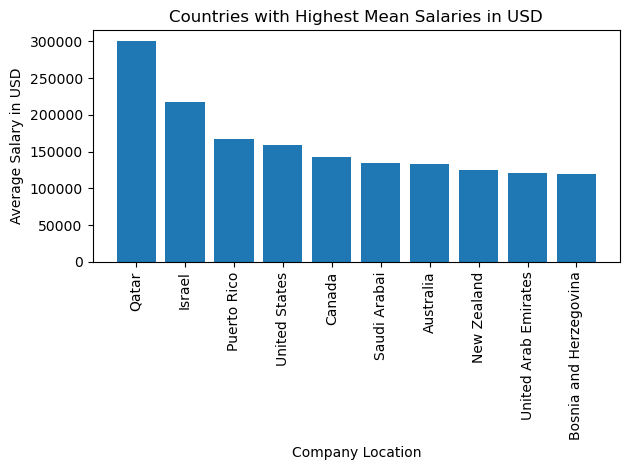

In [35]:
barChart1 = topten
plt.bar(topten['company_location'], topten['Salary(USD) Mean'], align='center')
plt.xticks(ticks=topten['company_location'], labels=['Qatar', 'Israel', 'Puerto Rico', 'United States', 'Canada', 'Saudi Arabai', 'Australia', 'New Zealand', 'United Arab Emirates', 'Bosnia and Herzegovina'], rotation = 90)
plt.ylabel('Average Salary in USD')
plt.xlabel('Company Location')
plt.title('Countries with Highest Mean Salaries in USD')
plt.tight_layout()


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_3.png')

plt.show()


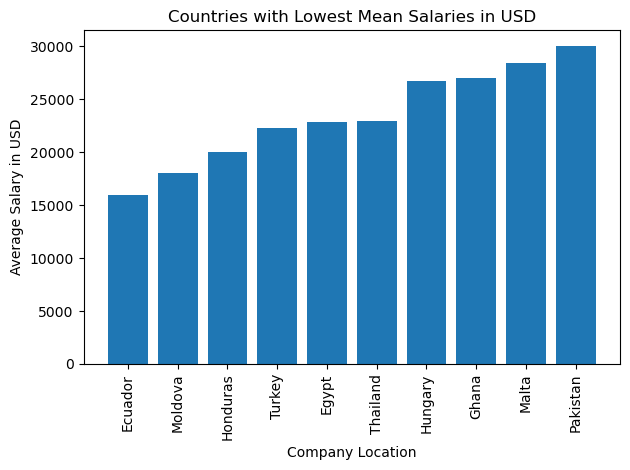

In [23]:
barChart2 = botten
plt.bar(botten['company_location'], botten['Salary(USD) Mean'])
plt.xticks(botten['company_location'], labels=['Ecuador', 'Moldova', 'Honduras', 'Turkey', 'Egypt', 'Thailand', 'Hungary', 'Ghana', 'Malta', 'Pakistan'], rotation = 90)
plt.ylabel('Average Salary in USD')
plt.xlabel('Company Location')
plt.title('Countries with Lowest Mean Salaries in USD')
plt.tight_layout()


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_4.png')

plt.show()

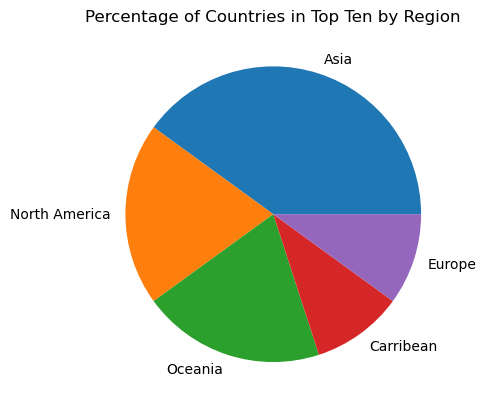

In [24]:
labels1 = ['Asia', 'North America', 'Oceania', 'Carribean', 'Europe']
sizes1 = [40,20,20,10,10]
fig, ax = plt.subplots()
ax.pie(sizes1, labels = labels1)
plt.title('Percentage of Countries in Top Ten by Region')


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_5.png')

plt.show()

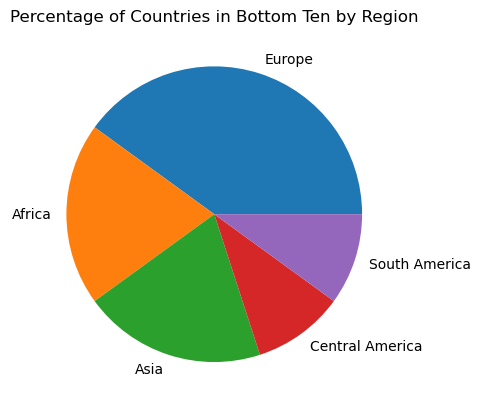

In [25]:
labels2 = ['Europe', 'Africa', 'Asia', 'Central America', 'South America']
sizes2 = [40,20,20,10,10]
fix, ax = plt.subplots()
ax.pie(sizes2, labels= labels2)
plt.title('Percentage of Countries in Bottom Ten by Region')


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_6.png')

plt.show()

In [26]:
# Start of Brianna's Data

# Load the CSV file into a DataFrame
df_salaries = pd.read_csv(data)

# Display the first few rows of the dataframe.
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


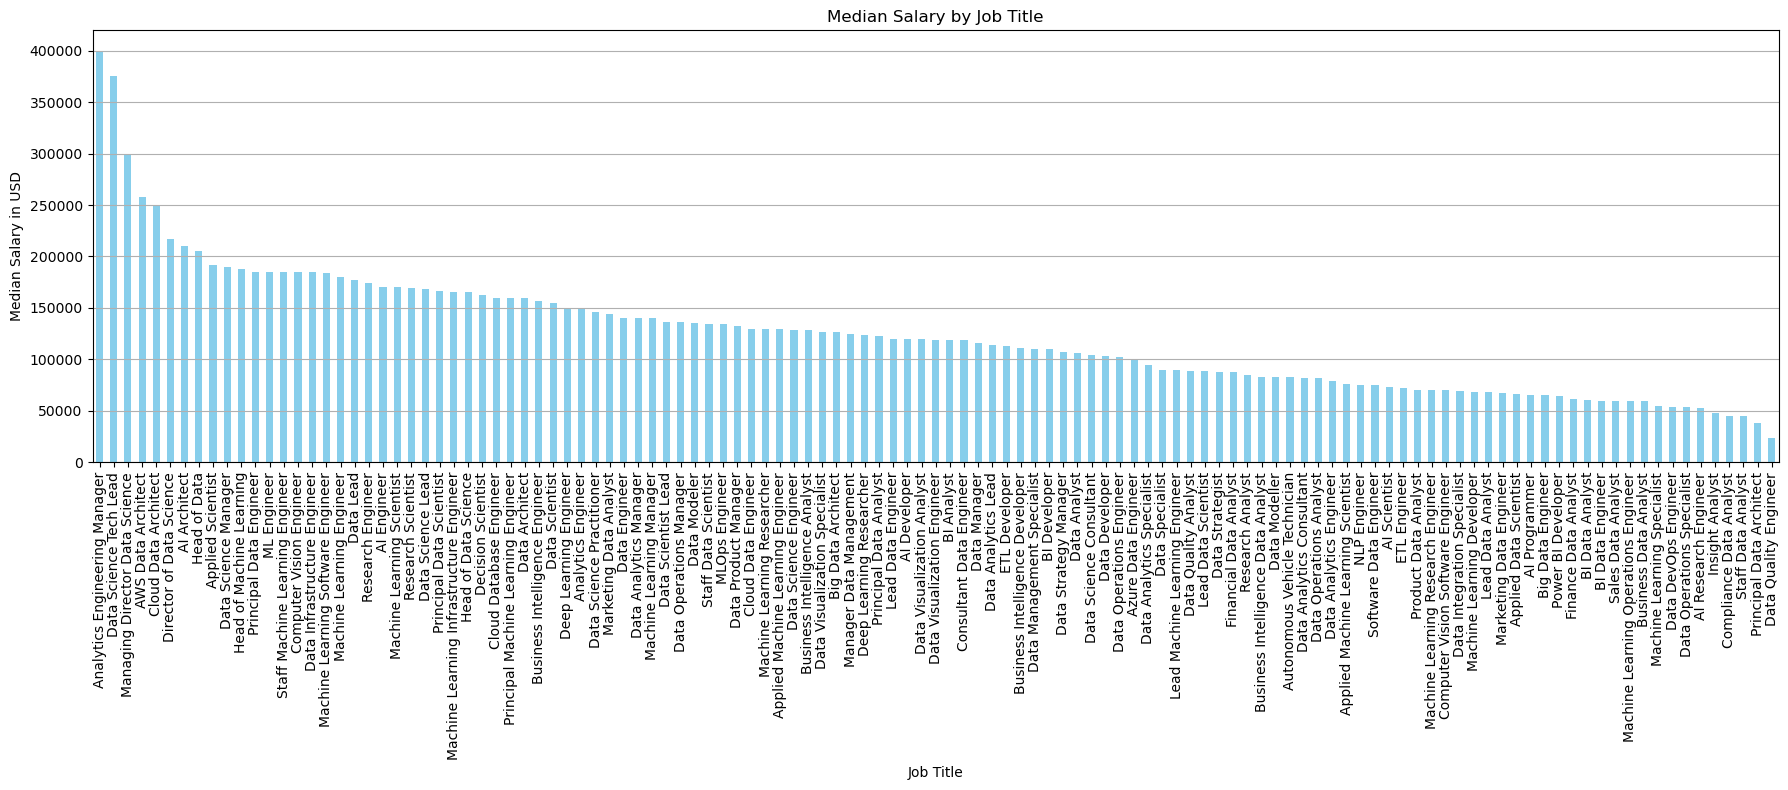

In [27]:
# Calculate the median salary for each job title
median_salary_by_job = df_salaries.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

# Create a bar chart for median salary by job title
plt.figure(figsize=(18, 8))
median_salary_by_job.plot(kind='bar', color='skyblue')
plt.title("Median Salary by Job Title")
plt.ylabel("Median Salary in USD")
plt.xlabel("Job Title")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y')


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_7.png')

plt.show()


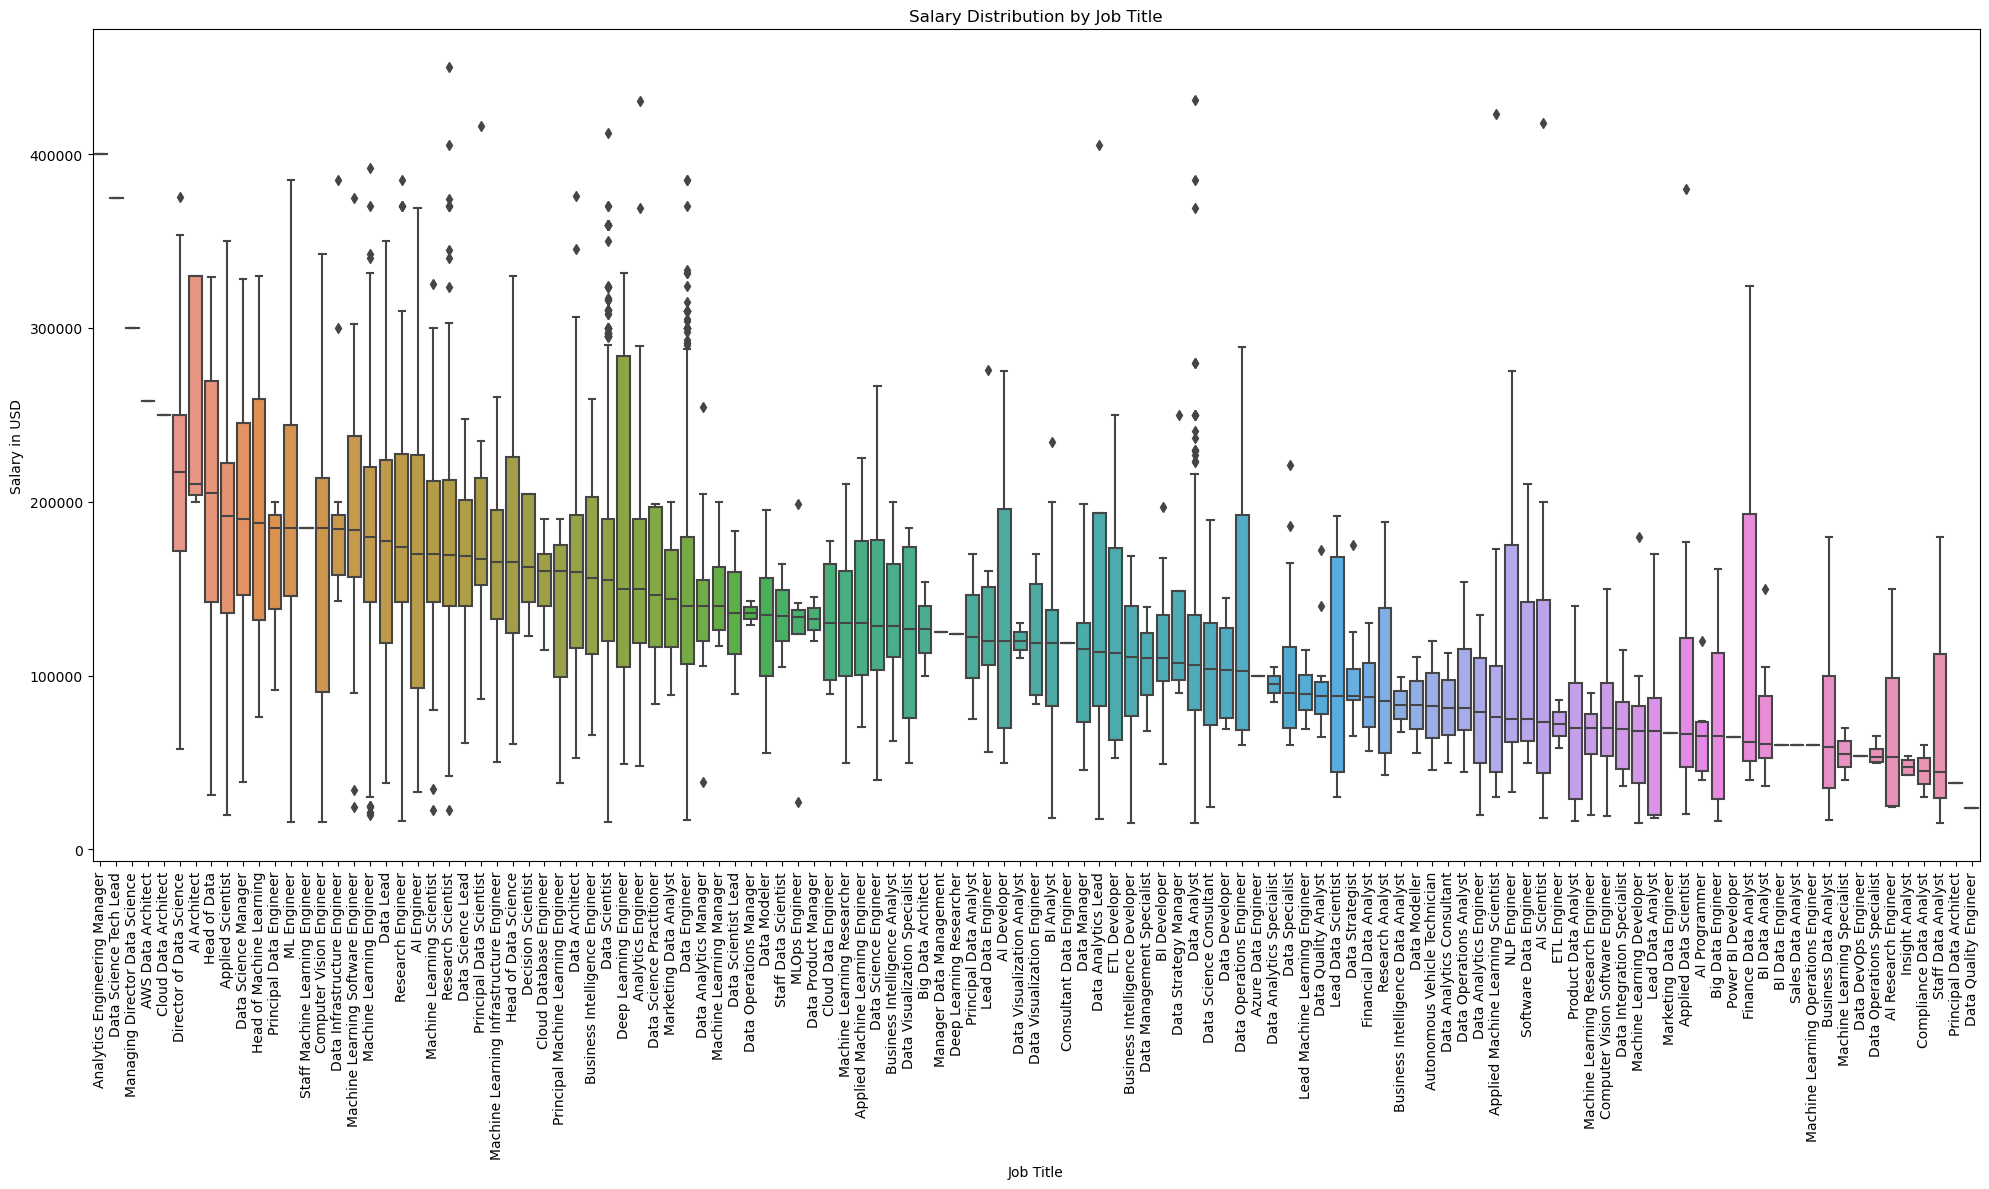

In [28]:
# Create a box plot for salary distribution based on job title, using actual median salaries

plt.figure(figsize=(20, 12))
sns.boxplot(x="job_title", y="salary_in_usd", data=df_salaries, order=median_salary_by_job.index)
plt.title("Salary Distribution by Job Title")
plt.ylabel("Salary in USD")
plt.xlabel("Job Title")
plt.xticks(rotation=90)
plt.tight_layout()


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_8.png')

plt.show()

In [29]:
# Start of Stan's Data

#path for dataset


data_jobs_salaries = pd.read_csv(data)

data_jobs_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M


In [30]:
#group dataset by job title and salary in usd column(top 10)

top_10_job_titles = data_jobs_salaries.groupby('job_title')['salary_in_usd'].mean().nlargest(10)

filtered_df_top = data_jobs_salaries[data_jobs_salaries['job_title'].isin(top_10_job_titles.index)]

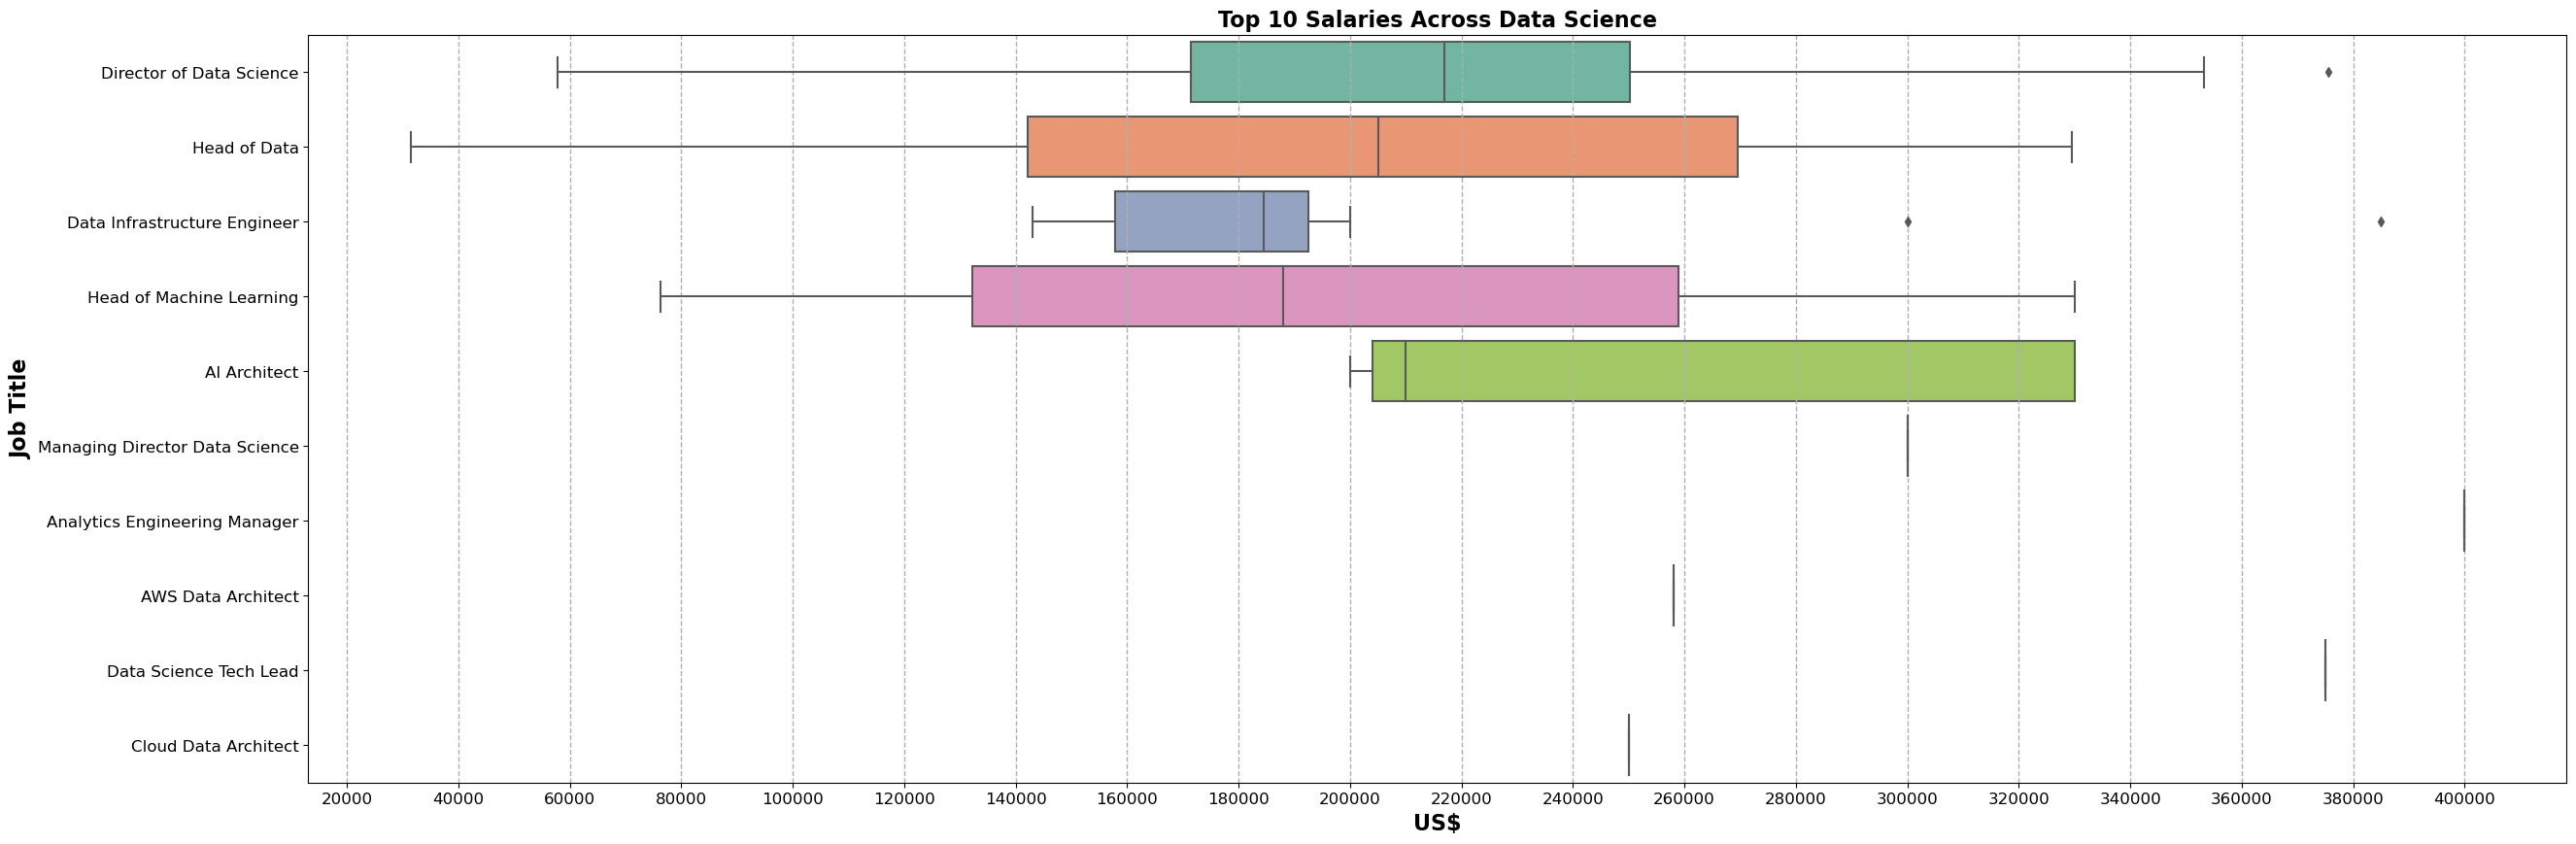

In [31]:
# Top 10 boxplot in the world

plt.figure(figsize=(30, 10))
sns.boxplot(y='job_title', x='salary_in_usd', data=filtered_df_top, palette='Set2')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.grid(axis='x', linestyle='--', linewidth=1.0)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=20000))


plt.title('Top 10 Salaries Across Data Science', fontsize=16, fontweight='bold')
plt.ylabel('Job Title', fontsize=16, fontweight='bold')
plt.xlabel('US$', fontsize=16, fontweight='bold')

plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_9.png')


plt.show()

In [32]:
#group dataset by job title and salary in usd column(bottom 10)

bottom_10_job_titles = data_jobs_salaries.groupby('job_title')['salary_in_usd'].mean().nsmallest(10)

filtered_df_bottom = data_jobs_salaries[data_jobs_salaries['job_title'].isin(bottom_10_job_titles.index)]

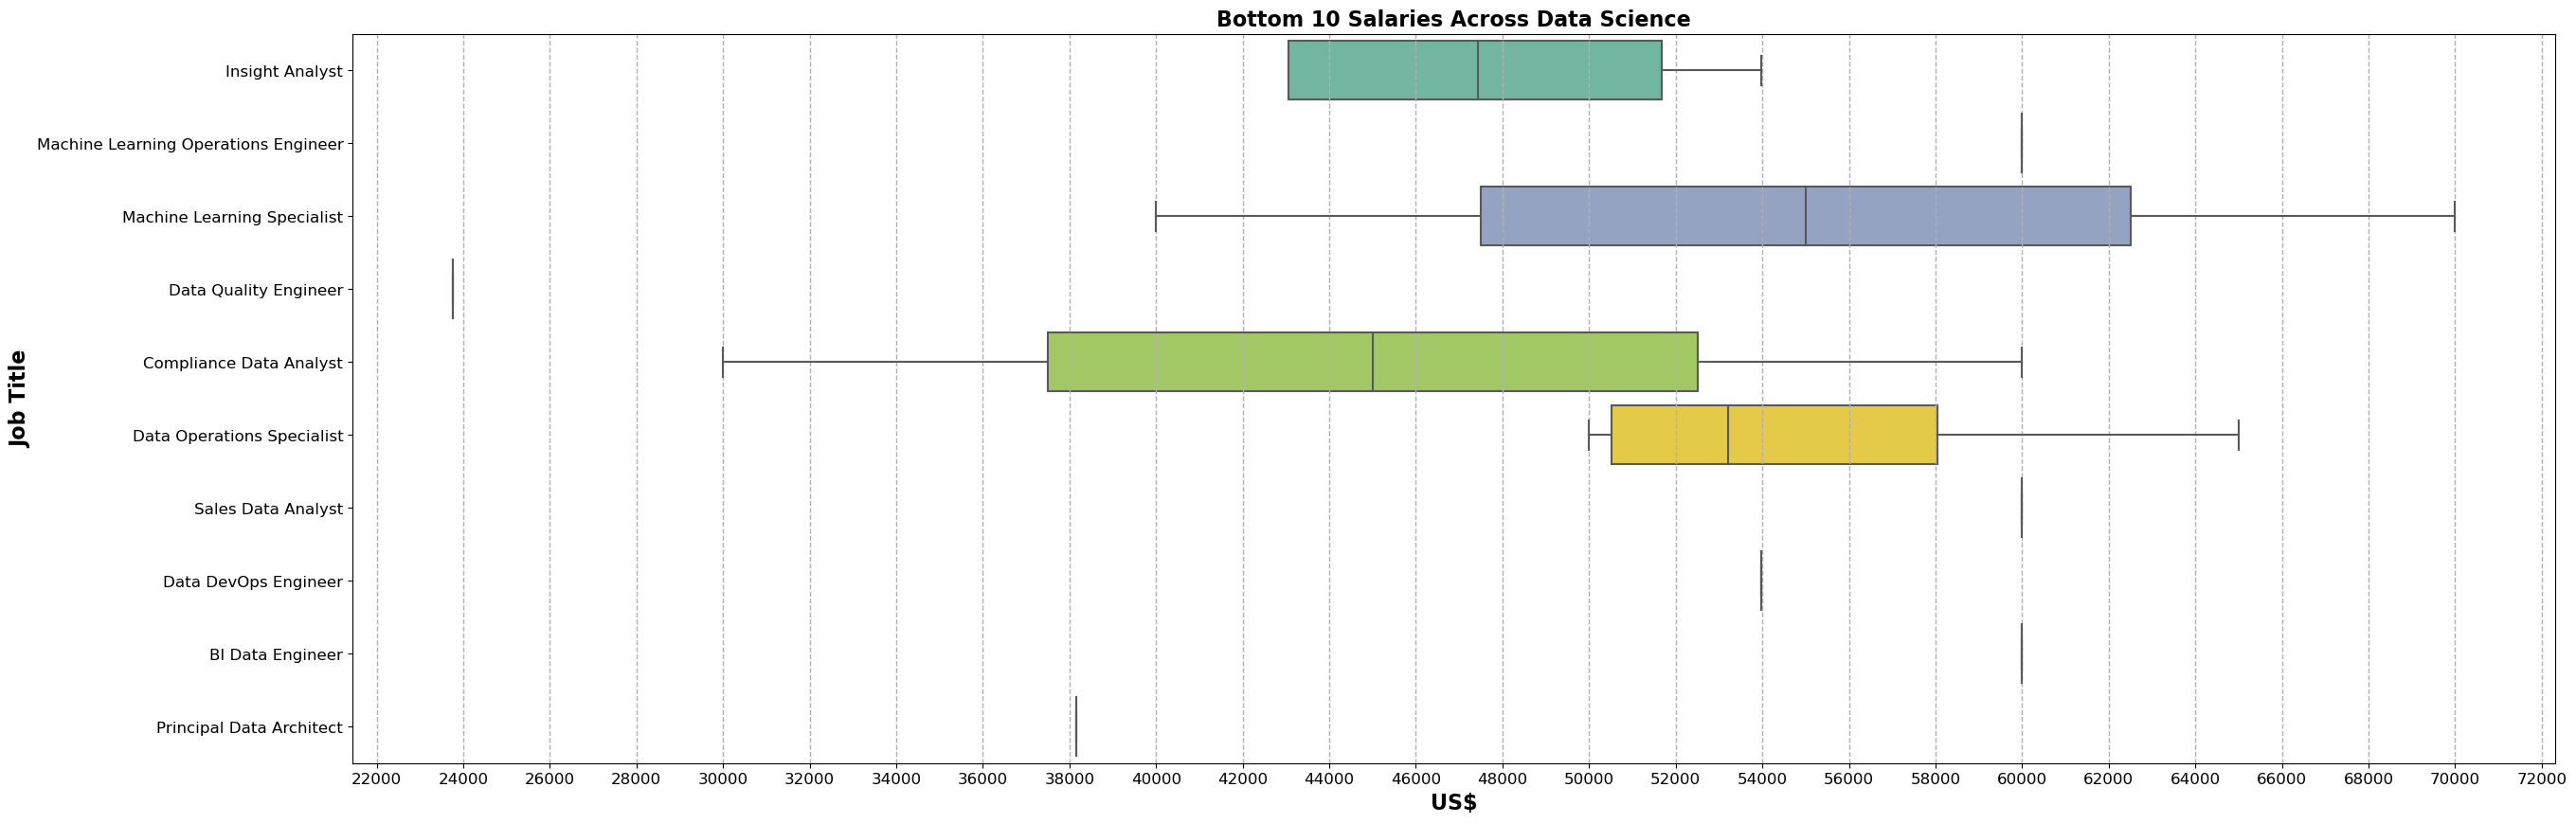

In [33]:
#Bottom 10 boxplot in the world

plt.figure(figsize=(30, 10))
sns.boxplot(y='job_title', x='salary_in_usd', data=filtered_df_bottom, palette='Set2')

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.grid(axis='x', linestyle='--', linewidth=1.0)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(base=2000))

plt.title('Bottom 10 Salaries Across Data Science', fontsize=16, fontweight='bold')
plt.xlabel('US$', fontsize=16, fontweight='bold')
plt.ylabel('Job Title', fontsize=16, fontweight='bold')


plt.savefig('C:/Users/Joseph Haas/Desktop/project-1/Resources/chart_10.png')

plt.show()